In [1]:
import pandas as pd
import numpy as np

In [48]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
# font_location = 'C:/Windows/Fonts/ARIALNI.TTF' #윈도우안에있는 폰트파일주소.
font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [3]:
crime_seoul = pd.read_csv('./cctv_data_collect/crime_seoul_3.csv', encoding='euc-kr')
crime_seoul

,구별,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생
0,중구,2,3,105,1395,1355
1,종로구,3,6,115,1070,1278
2,중구,1,6,65,1153,869
3,서대문구,2,5,154,1812,2056
4,종로구,3,5,96,1114,1015
5,용산구,5,14,194,1557,2050
6,성북구,2,2,86,953,1194
7,동대문구,5,13,173,1981,2548
8,마포구,8,14,294,2555,2983
9,영등포구,14,22,295,2964,3572


In [4]:
crime_seoul['구별'].unique()

array(['중구', '종로구', '서대문구', '용산구', '성북구', '동대문구', '마포구', '영등포구', '성동구',
       '동작구', '광진구', '은평구', '강북구', '금천구', '중랑구', '강남구', '관악구', '강서구',
       '강동구', '구로구', '서초구', '양천구', '송파구', '노원구', '도봉구'], dtype=object)

In [5]:
len(crime_seoul['구별'].unique())

25

In [6]:
crime_seoul.set_index('구별', inplace=True)
crime_seoul

,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생
구별,,,,,
중구,2,3,105,1395,1355
종로구,3,6,115,1070,1278
중구,1,6,65,1153,869
서대문구,2,5,154,1812,2056
종로구,3,5,96,1114,1015
용산구,5,14,194,1557,2050
성북구,2,2,86,953,1194
동대문구,5,13,173,1981,2548
마포구,8,14,294,2555,2983


In [7]:
crime_seoul.columns

Index(['살인 발생', '강도 발생', '강간 발생', '절도 발생', '폭력 발생'], dtype='object')

In [8]:
crime_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 중구 to 강남구
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   살인 발생   31 non-null     int64
 1   강도 발생   31 non-null     int64
 2   강간 발생   31 non-null     int64
 3   절도 발생   31 non-null     int64
 4   폭력 발생   31 non-null     int64
dtypes: int64(5)
memory usage: 1.5+ KB


In [9]:
# 각각의 수치가 가장 높은 구는 어디일까?
crime_seoul.idxmax()

살인 발생    영등포구
강도 발생    영등포구
강간 발생     서초구
절도 발생     송파구
폭력 발생    영등포구
dtype: object

In [10]:
total_data = pd.read_csv('total_data_result3.csv', encoding='utf8')
total_data

,Unnamed: 0,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생
0,0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,3,15,300,2411,2465
1,1,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,10,6,149,1439,1819
2,2,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,4,6,156,2366,2712
3,3,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,7,14,153,1434,2649
4,4,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,7,13,262,2096,3207
5,5,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,9,12,320,2706,3298
6,6,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,4,14,240,3026,2625
7,7,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,8,15,281,2335,3007
8,8,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,3,6,151,1567,2054
9,9,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,10,7,197,2193,2723


In [11]:
del total_data['Unnamed: 0']

In [12]:
total_data.set_index('구별', inplace=True)
total_data

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생
구별,,,,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,3,15,300,2411,2465
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,10,6,149,1439,1819
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,4,6,156,2366,2712
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,7,14,153,1434,2649
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,7,13,262,2096,3207
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,9,12,320,2706,3298
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,4,14,240,3026,2625
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,8,15,281,2335,3007
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,3,6,151,1567,2054


In [13]:
# 전체 구의 범죄 발생 횟수는 어떻게 될까?
total_data['범죄 발생'] = total_data[['살인 발생', '강도 발생', '강간 발생', '절도 발생', '폭력 발생']].sum(axis=1)
total_data

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,범죄 발생
구별,,,,,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,3,15,300,2411,2465,5194
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,10,6,149,1439,1819,3423
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,4,6,156,2366,2712,5244
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,7,14,153,1434,2649,4257
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,7,13,262,2096,3207,5585
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,9,12,320,2706,3298,6345
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,4,14,240,3026,2625,5909
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,8,15,281,2335,3007,5646
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,3,6,151,1567,2054,3781


In [14]:
# 범죄가 가장 많이 발생하는 구는 어디일까?
total_data['범죄 발생'].idxmax()
# => 관악구에서 범죄가 가장 많이 발생한다는 것을 알 수 있다

'관악구'

In [15]:
# 외국인비율과 범죄 발생의 상관관계
murder = np.corrcoef(total_data['외국인비율'], total_data['범죄 발생'])
murder
# => 외국인비율과 범죄 발생은 약간 음의 상관관계가 있다

array([[ 1.      , -0.186649],
       [-0.186649,  1.      ]])

In [16]:
# cctv 최근증가율과 범죄 발생의 상관관계
inc = np.corrcoef(total_data['최근증가율'], total_data['범죄 발생'])
inc
# => cctv 최근증가율과 범죄 발생은 약간 음의 상관관계가 있다

array([[ 1.        , -0.18956881],
       [-0.18956881,  1.        ]])

In [17]:
# 고령자비율과 범죄 발생의 상관관계
old_p = np.corrcoef(total_data['고령자비율'], total_data['범죄 발생'])
old_p
# => 고령자비율과 범죄 발생은 약간 음의 상관관계가 있다

array([[ 1.        , -0.56747453],
       [-0.56747453,  1.        ]])

In [18]:
# 인구수와 범죄 발생의 상관관계
pop = np.corrcoef(total_data['인구수'], total_data['범죄 발생'])
pop
# 인구수와 범죄 발생은 양의 상관관계가 있다

array([[1.        , 0.54022888],
       [0.54022888, 1.        ]])

In [19]:
murder_list = murder.tolist()
murder_list

[[1.0, -0.18664899976247973], [-0.1866489997624797, 1.0]]

In [20]:
murder_corr = murder_list[0][1]
murder_corr

-0.18664899976247973

In [21]:
inc_list = inc.tolist()
inc_list

[[0.9999999999999998, -0.189568806687079], [-0.18956880668707898, 1.0]]

In [22]:
inc_corr = inc_list[0][1]
inc_corr

-0.189568806687079

In [23]:
pop_list = pop.tolist()
pop_list

[[1.0, 0.5402288845959491], [0.5402288845959491, 1.0]]

In [24]:
pop_corr = pop_list[0][1]
pop_corr

0.5402288845959491

In [25]:
old_p_list = old_p.tolist()
old_p_list

[[1.0, -0.5674745325528066], [-0.5674745325528066, 1.0]]

In [26]:
old_p_corr = old_p_list[0][1]
old_p_corr

-0.5674745325528066

In [27]:
corr_list = [murder_corr, inc_corr, pop_corr, old_p_corr]
corr_list

[-0.18664899976247973,
 -0.189568806687079,
 0.5402288845959491,
 -0.5674745325528066]

In [28]:
x_data = ['murder_corr', 'inc_corr', 'pop_corr', 'old_p_corr']

Text(0.5, 1.0, 'correlation')

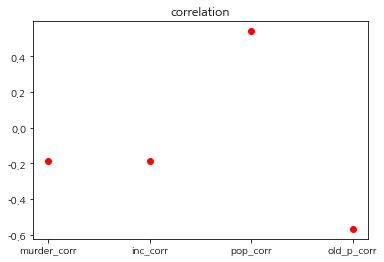

In [29]:
fig = plt.plot(x_data, corr_list, 'ro')
plt.title('correlation')

In [30]:
gwanag = total_data[total_data.index == '관악구']
gwanag

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,범죄 발생
구별,,,,,,,,,,,,,,
관악구,1496,149.29078,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,9,12,320,2706,3298,6345


Text(0.5, 1.0, 'person count')

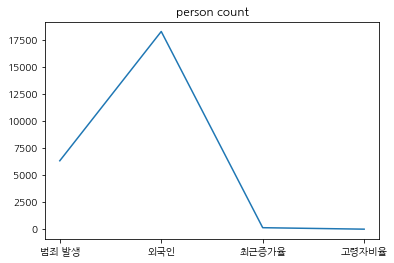

In [31]:
fig = plt.plot(['범죄 발생', '외국인', '최근증가율', '고령자비율'], [6345, 18312.0, 149.29078, 12.955291])
plt.title('person count')

In [32]:
dr_corr = total_data.corr()

In [33]:
# heatmap
import seaborn as sns

In [34]:
cols = total_data.columns

In [35]:
sns.set(font_scale=1.5)

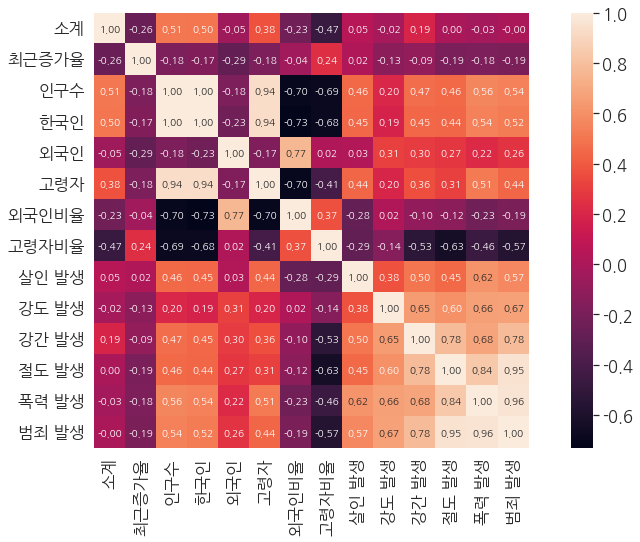

In [49]:
sns.heatmap(dr_corr.values,
            cbar = True,
            annot= True,
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols,
            annot_kws={"size": 10}
           )
plt.gcf().set_size_inches(15, 8)

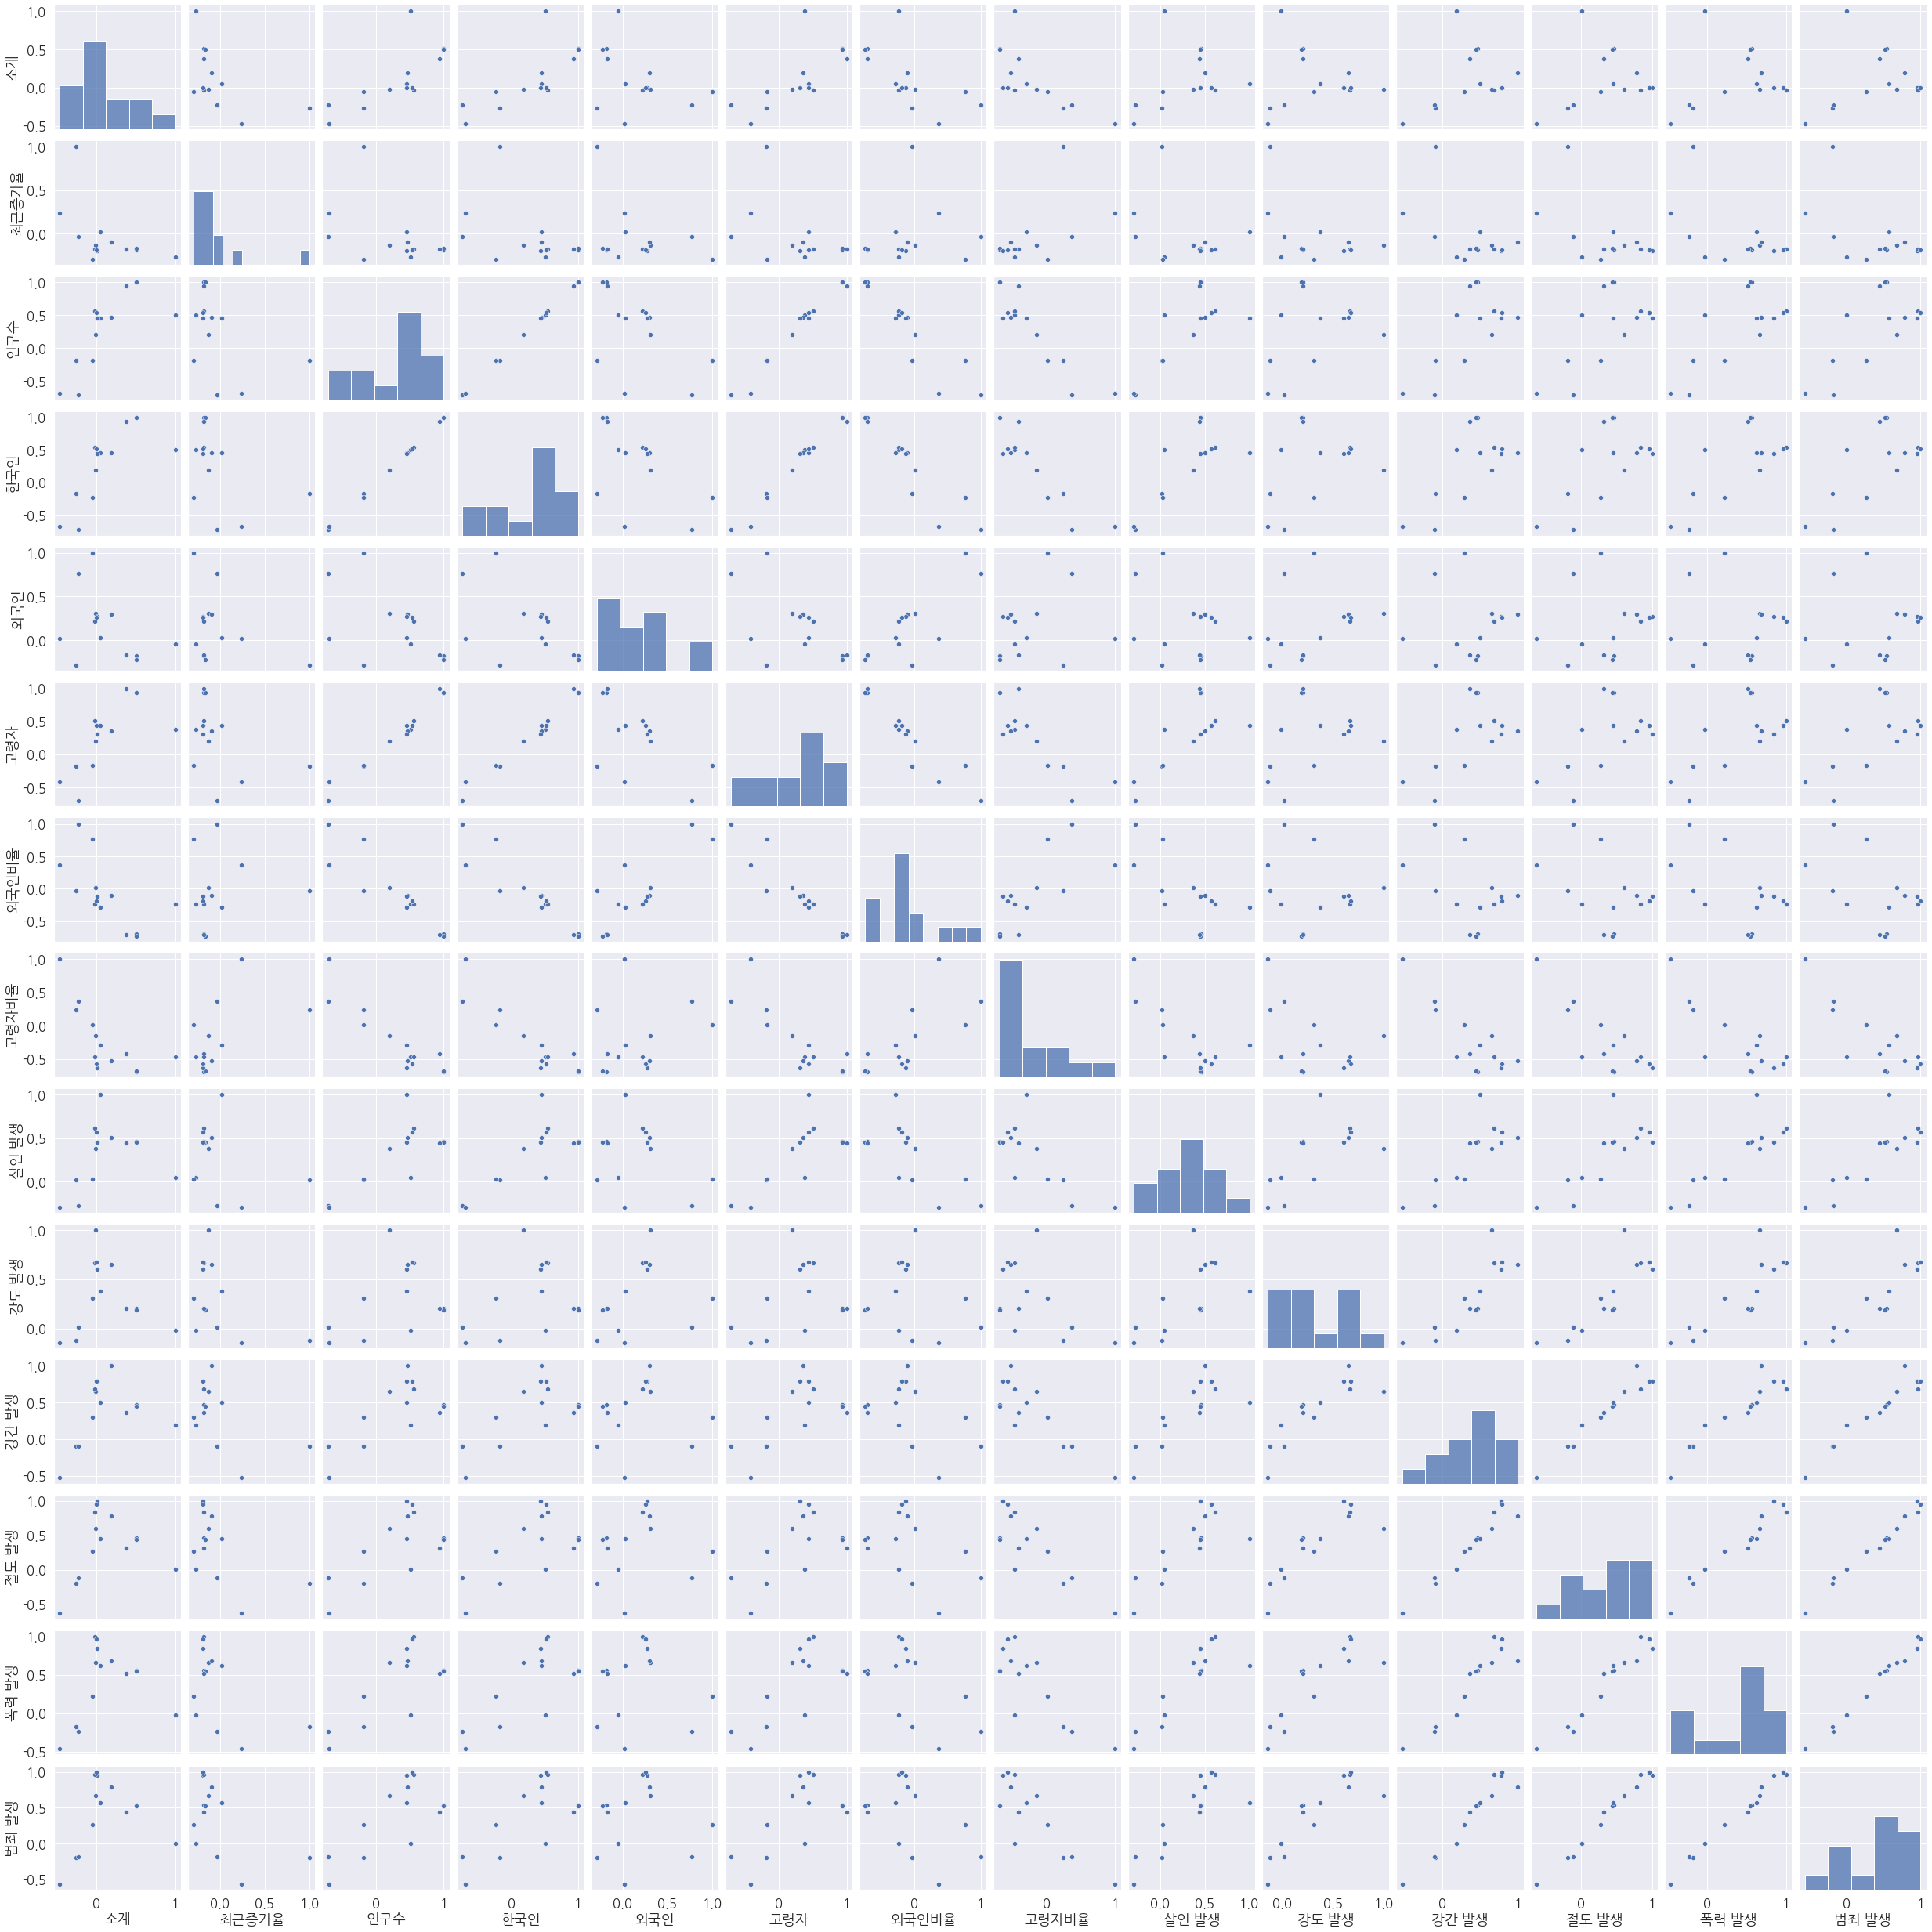

In [50]:
# pairplot
sns.pairplot(dr_corr, height=2.5)
plt.show()

Text(0.5, 1.0, 'number of crimes by ward')

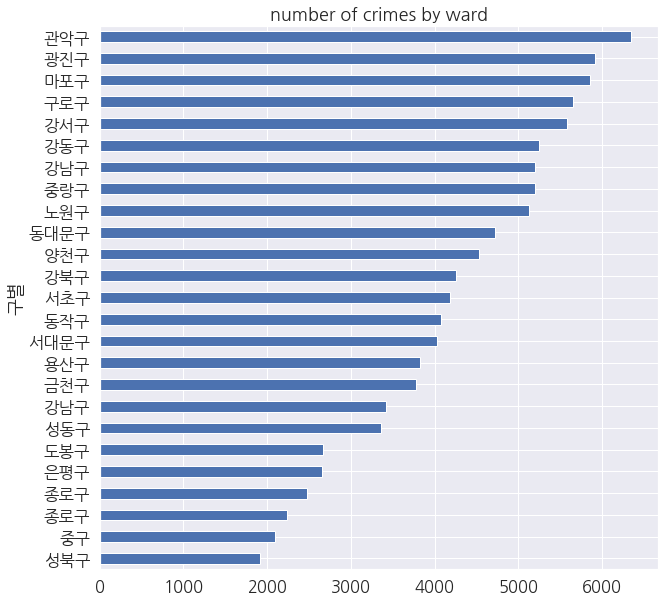

In [51]:
# 각 구의 범죄 발생 수를 알아보자
total_data['범죄 발생'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
# => 1등이 관악구, 2등이 광진구, 3등이 마포구 순으로 발생이 많았으며, 성북구, 중구, 종로구가 발생 수가 적은 구에 속했다.
plt.title("number of crimes by ward")

Text(0.5, 1.0, 'Number of crimes by population')

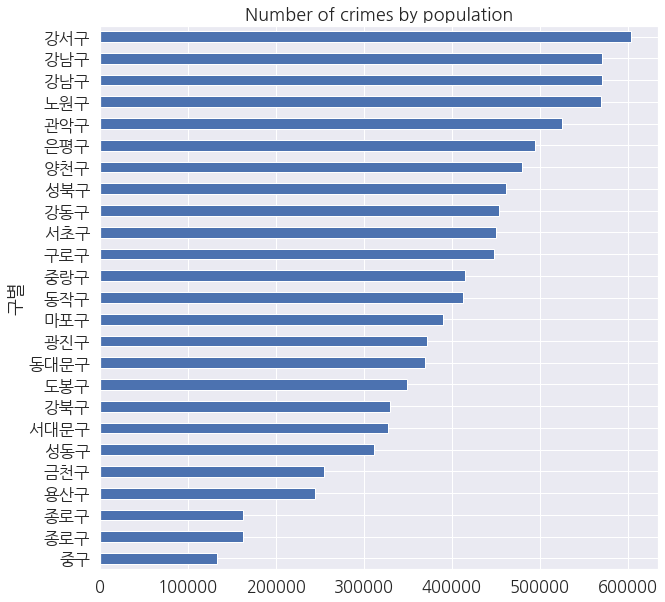

In [52]:
# 각 구의 인구수를 그래프를 통해 알아보자
total_data['인구수'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.title("Number of crimes by population")
# => 인구는 강서구가 가장 많았고, 중구가 가장 적었다.

In [40]:
pf1 = np.polyfit(total_data['인구수'], total_data['범죄 발생'], 1)
pf1

array([5.35618870e-03, 2.05994148e+03])

In [41]:
f1 = np.poly1d(pf1)
f1

poly1d([5.35618870e-03, 2.05994148e+03])

In [42]:
fx = np.linspace(100000, 700000, 100)
fx[:5]

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242])

In [43]:
len(total_data['범죄 발생'])

25

In [55]:
total_data['오차'] = np.abs(total_data['범죄 발생'] - f1(total_data['인구수']))
df_sort = total_data.sort_values(by='오차', ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생,범죄 발생,오차
구별,,,,,,,,,,,,,,,
성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062,3,3,64,832,1015,1917,2613.537080
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,1,7,96,1095,1461,2660,2047.976899
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,4,14,240,3026,2625,5909,1855.677909
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,8,14,294,2555,2983,5854,1707.024949
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,10,6,149,1439,1819,3423,1692.647133
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,9,12,320,2706,3298,6345,1470.301015
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,3,9,102,1063,1487,2664,1263.355245
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,8,15,281,2335,3007,5646,1187.160862
중랑구,660,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,13,11,187,2135,2847,5193,912.902235


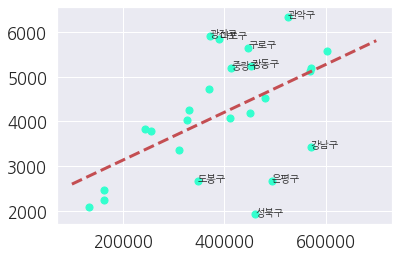

In [57]:
plt.scatter(total_Data['인구수'], total_Data['범죄 발생'], s=50 , c='#33FFCE') #'r',  c='#33FFCE'
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
for n in range(10):
    plt.text(df_sort['인구수'][n], #글자가 쓰여질 x축 좌표
             df_sort['범죄 발생'][n], #글자가 쓰여질  y축 좌표
             df_sort.index[n], #쓰여질 글자
             fontsize=10
            )
# plt.text(350000, 500, 'low')
# plt.text(580000, 2800, 'high')

In [47]:
# 인사이트
# 1. 각각의 수치가 가장 높은 구는 어디일까?
# 살인 발생    영등포구
# 강도 발생    영등포구
# 강간 발생     서초구
# 절도 발생     송파구
# 폭력 발생    영등포구

# 2. 범죄가 가장 많이 발생하는 구는 어디일까?
# => 관악구에서 범죄가 가장 많이 발생한다는 것을 알 수 있다

# 3. 외국인비율과 범죄 발생의 상관관계
# => 외국인비율과 범죄 발생은 약간 음의 상관관계가 있다

# 4. cctv 최근증가율과 범죄 발생의 상관관계
# => cctv 최근증가율과 범죄 발생은 약간 음의 상관관계가 있다

# 5. 고령자비율과 범죄 발생의 상관관계
# => 고령자비율과 범죄 발생은 약간 음의 상관관계가 있다

# 6. 인구수와 범죄 발생의 상관관계
# => 인구수와 범죄 발생은 양의 상관관계가 있다

# 7. 각 구의 범죄 발생 수를 알아보자
# => 1등이 관악구, 2등이 광진구, 3등이 마포구 순으로 발생이 많았으며, 성북구, 중구, 종로구가 발생 수가 적은 구에 속했다.

# 8. 각 구의 인구수를 그래프를 통해 알아보자
# => 인구는 강서구가 가장 많았고, 중구가 가장 적었다.

# 9.인구수와 범죄발생의 관계를 알아보자
# => 인구수와 범죄발생의 관계를 시각화하면 in57과 같다(plt.scatter)
# 인구수와 범죄 발생의 적정기준선을 위에 위치한 구: 광진구, 마포구, 구로구, 중랑구, 강동구, 관악구
# 인구수와 범죄 발생의 적정기준선을 아래에 위치한 구: 강남구, 은평구, 도봉구, 성북구

# 10. 만약 cctv를 추가로 설치해야한다면 어느 구에 설치해야 하는가?
# => 인구수와 범죄 발생의 적정 기준선을 오버한 광진구, 마포구, 구로구, 중랑구, 강동구, 관악구에 cctv를 추가로 설치해야 한다.